In [70]:
### Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [71]:
df = pd.read_csv('Iris.csv')

In [72]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
df_cp=df.copy()  ## Creating a copy

In [75]:
df_cp

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [76]:
df_cp.drop(['Id'],inplace=True,axis=1)

In [77]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
df_cp.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Insights
#### - As the dataset does not contain null values we will go to Pre Processing part

### Data Pre Processing:

In [79]:
df_cp['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### We will replace setosa with 1,versicolor with 2 and virginica with 3

In [80]:
df_cp['Species']=df_cp['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [81]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Data Visualization

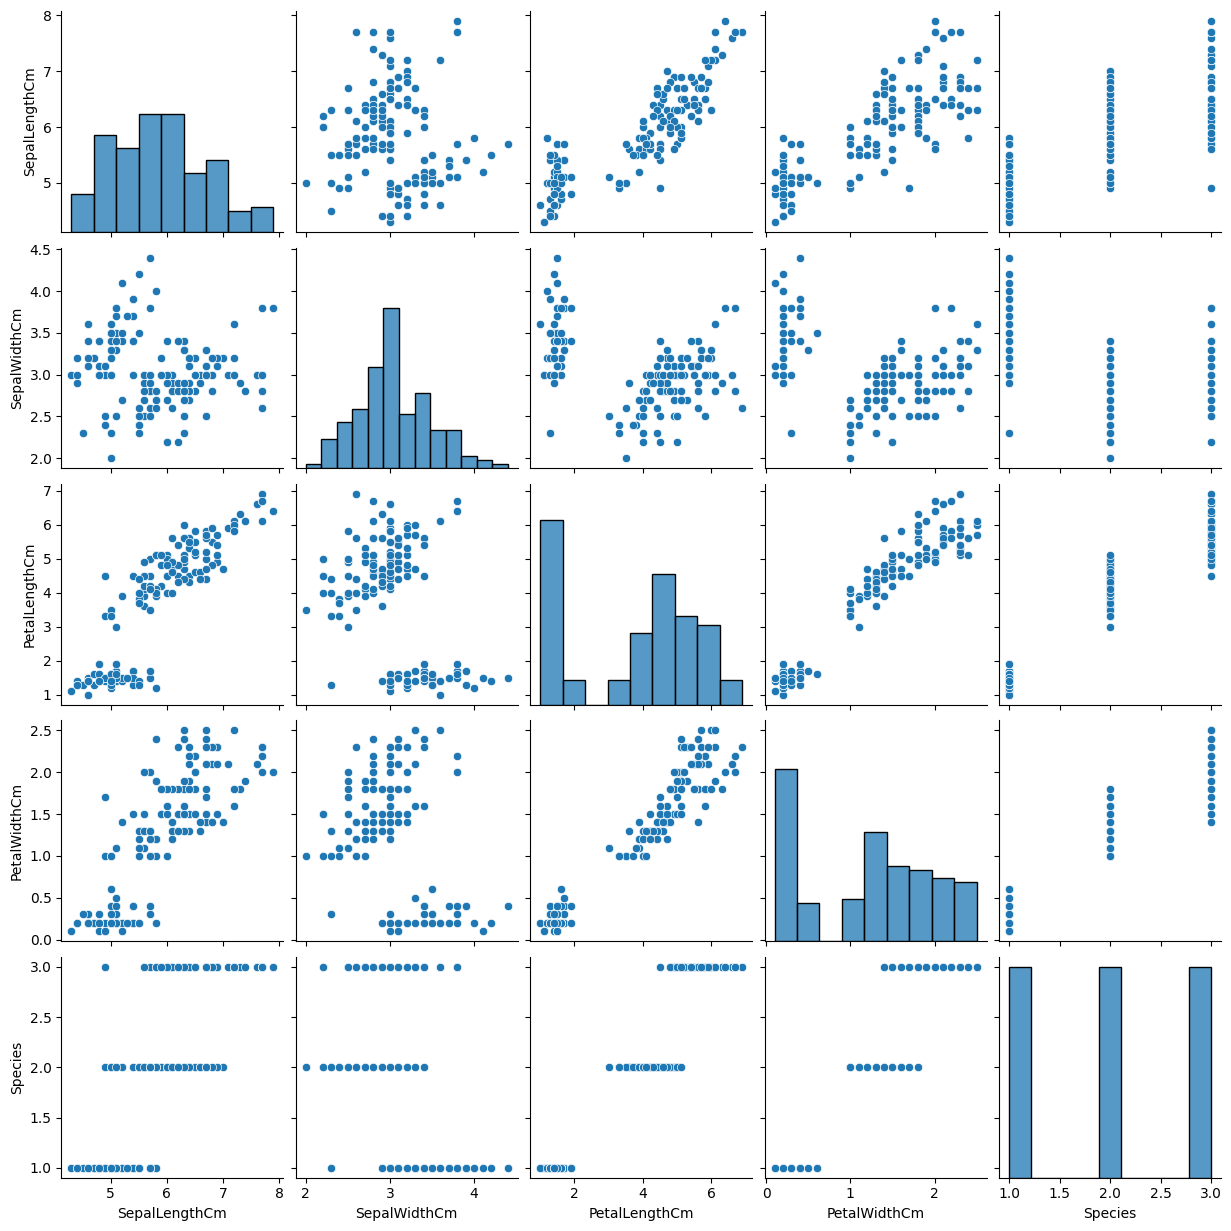

In [82]:
import seaborn as sns

sns.pairplot(df_cp)

### 

### Splitting the data into Train and Test

In [83]:
X = df_cp.drop(['Species'],axis=1)
y = df_cp['Species']

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

### Standard Scaling - as the units may differ

In [85]:
from sklearn.preprocessing import StandardScaler


scale=StandardScaler()

X_train=pd.DataFrame(scale.fit_transform(X_train),columns=scale.get_feature_names_out())


In [86]:
X_test=pd.DataFrame(scale.transform(X_test),columns=scale.get_feature_names_out())


### As this is a Supervised Learning Problem Statement we will use Regression and Classification Based Algorithms 

In [87]:
from sklearn.linear_model import LinearRegression


linear = LinearRegression(n_jobs=-1)

linear.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [88]:
pred=linear.predict(X_test)

In [89]:
### function to check accuraccy

def checkacc(true,pred):
  from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
  mse=mean_squared_error(true,pred)
  mae=mean_absolute_error(true,pred)
  rmse=root_mean_squared_error(true,pred)
  r2=r2_score(true,pred)
  print(20*'*')
  print("MSE:",mse)
  print("MAE:",mae)
  print("RMSE:",rmse)
  print("R2 Score(Overall Accuraccy):",(r2*100))
  print(20*'*')
  
  

In [90]:
checkacc(y_test,pred)

********************
MSE: 0.04447086315865553
MAE: 0.1557310841632335
RMSE: 0.2108811588517465
R2 Score(Overall Accuraccy): 94.27868501294299
********************


### We will Try Using Polynomial,Ridge,Lasso and ElasticNet
### We will use Cross-Validation also

In [91]:
from sklearn.linear_model import Ridge,RidgeCV
ridge=Ridge()
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
checkacc(y_test,pred)


ridge=RidgeCV(cv=30)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
checkacc(y_test,pred)


********************
MSE: 0.04447435304925643
MAE: 0.15412375680536414
RMSE: 0.21088943323281145
R2 Score(Overall Accuraccy): 94.27823602765284
********************
********************
MSE: 0.04447435304925643
MAE: 0.15412375680536414
RMSE: 0.21088943323281145
R2 Score(Overall Accuraccy): 94.27823602765284
********************


In [92]:
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso()
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
checkacc(y_test,pred)


ridge=LassoCV(cv=50)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
checkacc(y_test,pred)


********************
MSE: 0.7782917611489039
MAE: 0.78010582010582
RMSE: 0.8822084567430216
R2 Score(Overall Accuraccy): -0.12965796229542637
********************
********************
MSE: 0.04508111971864759
MAE: 0.14878690146840587
RMSE: 0.212323149276398
R2 Score(Overall Accuraccy): 94.20017360671783
********************


In [93]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
elastic=ElasticNet()
elastic.fit(X_train,y_train)
pred=elastic.predict(X_test)
checkacc(y_test,pred)


elastic=ElasticNetCV(cv=5)
elastic.fit(X_train,y_train)
pred=elastic.predict(X_test)
checkacc(y_test,pred)


********************
MSE: 0.4522547371863777
MAE: 0.6016999251830032
RMSE: 0.672498875230567
R2 Score(Overall Accuraccy): 41.81602015232435
********************
********************
MSE: 0.04430775844382742
MAE: 0.15417552640450552
RMSE: 0.21049408173112
R2 Score(Overall Accuraccy): 94.29966894226489
********************


### We will use XGB also

In [94]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_jobs=-1,random_state=123)

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [95]:
pred=xgb.predict(X_test)

checkacc(y_test,pred)

********************
MSE: 0.043794143131736345
MAE: 0.06059159172905816
RMSE: 0.20927050229723335
R2 Score(Overall Accuraccy): 94.36574578285217
********************


### As the Overall Accuraccy is high for XGB we will use that

In [96]:

model=XGBRegressor(n_jobs=-1,random_state=123)

model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [97]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [98]:
np.round(xgb.predict(scale.transform([[5.5,4.5,6.7,1.0]])))  ##Testing 

array([3.], dtype=float32)

## Now We will try classification Based Approach

In [100]:
from sklearn.linear_model import LogisticRegression


m=LogisticRegression(n_jobs=-1)

m.fit(X_train,y_train)

LogisticRegression(n_jobs=-1)

In [101]:
pred=m.predict(X_test)

checkacc(y_test,pred)

********************
MSE: 0.022222222222222223
MAE: 0.022222222222222223
RMSE: 0.14907119849998599
R2 Score(Overall Accuraccy): 97.141041931385
********************


### Therefore,we will choose Logistic Regression


### Serializing the model - Converting into pickle format

In [103]:
import pickle

pickle.dump(m,open('Task1IrisModel.pkl','wb'))

In [107]:
mod=pickle.load(open('Task1IrisModel.pkl','rb'))

In [114]:
mod.predict([[5.5,6.1,3.2,0.4]])  ## verginica

array([3])